<a href="https://colab.research.google.com/github/Nabajyoti4/Dog_Breed_Identification/blob/main/Dog_Breed_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# End to end Multi class Dog Breed Classification
This nootebook builds an end to end multi class image classifier using Tensorflow 2.0 and TesorFlow Hub

## 1. Problem
Identifying the breed of a dog given an image of a dog.

## 2. Data
The data we are using is from kaggle dog breed identification competition

## 3. Evaluation
The evaluation ida  file with prediction probabilites for each dog breed of each test image

## 4. Features
Some inforamtion about the data:
* We are dealing with images (unstrcutured data) so its proably best we use deep learning/tranfer learning
* There are 120 breeds of dogs
* There are around 10000+ images in training set
* There are around 10000+ images in test set

In [ ]:
#!unzip "/content/drive/My Drive/Dog Vision/dog-breed-identification.zip" -d "drive/My Drive/Dog Vision"

### Get our worksapce ready

* Import TensorFlow 2.x
* Import TenserFlow Hub
* Make sure we are using GPU

In [ ]:
# Import Tensorflow into colab
import tensorflow as tf
print("Tf Version,", tf.__version__)

Tf Version, 2.3.0


In [ ]:
 # Import hub
 import tensorflow_hub as hub
 print("TF Hub version", hub.__version__)

TF Hub version 0.7.0


In [ ]:
# check for gpu availabilty
print("GPU",  "available" if tf.config.list_physical_devices("GPU") else "Not available")

GPU available


## Getting our data ready(turning into tensors)

with all machine learning models, our data has to be in numerical format. So that what we will be doing first. Turning our images into tensors (numerical data)

In [ ]:
# Checkout the labels of our data
import pandas as pd

labels_csv = pd.read_csv("drive/My Drive/Dog Vision/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     e5ceecb78014cf7eb9bed9a6ce23dbf0  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [ ]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [ ]:
labels_csv.shape

(10222, 2)

In [ ]:
# How many images are there of each breed?
labels_csv["breed"].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
komondor                 67
brabancon_griffon        67
briard                   66
eskimo_dog               66
Name: breed, Length: 120, dtype: int64

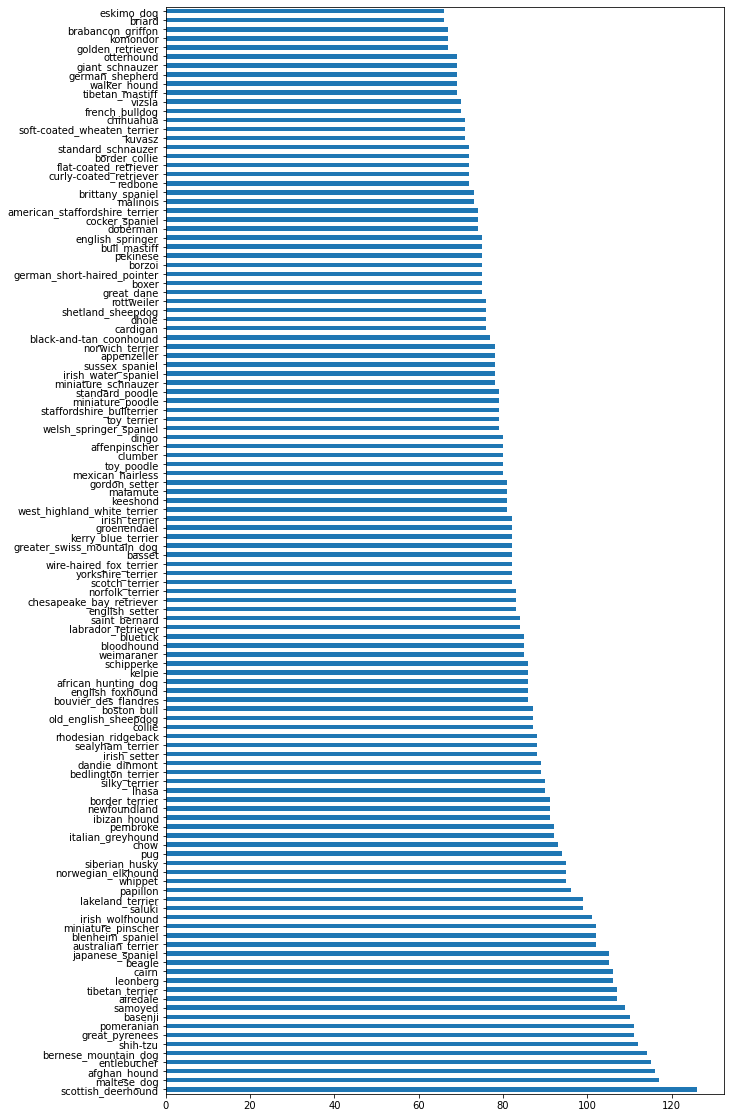

In [ ]:
labels_csv["breed"].value_counts().plot.barh(figsize=(10,20))

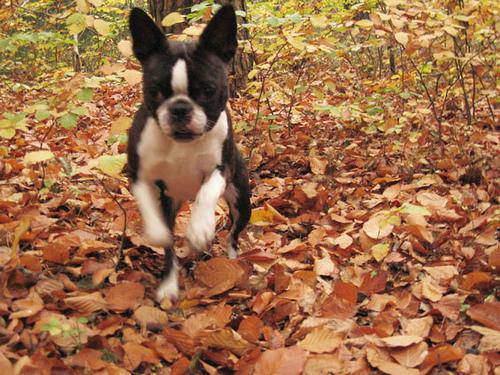

In [ ]:
# Lets view an image 
from IPython.display import Image
Image("drive/My Drive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

### Getting images and their labels

Lets get a list of all of our image file pathname

In [ ]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [ ]:
# Create pathnames from image ID's

filenames = ["drive/My Drive/Dog Vision/train/"+fnames+".jpg" for fnames in labels_csv["id"]]
filenames[:10]

['drive/My Drive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

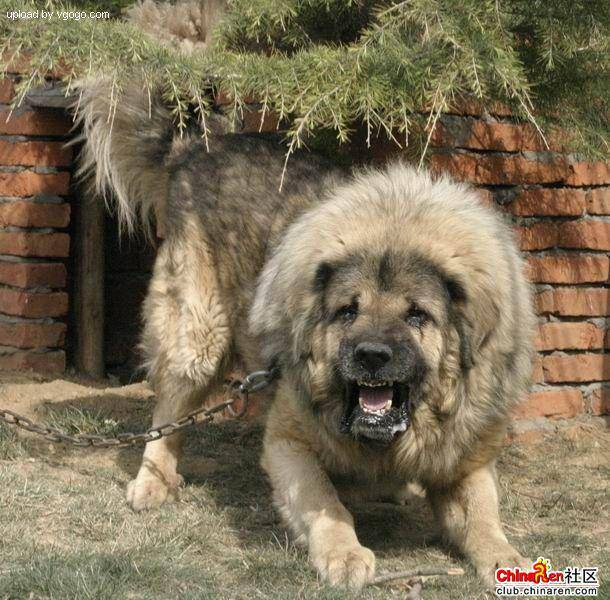

In [ ]:
Image(filenames[9000])

In [ ]:
# check wheather numbers of label macthes number of train data

import os

if len(os.listdir("drive/My Drive/Dog Vision/train/")) == len(filenames):
  print("Equal")
else:
  print("Nopt equal")  

Equal


 Since we have now got our training image pathnames in alist , lets prepare or labels

In [ ]:
import numpy as np
# wea re using the breed names as labels beacoz we have to find the breed of a dog from the image

labels = labels_csv["breed"]

# convert all the labels data to numpy array
labels = np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
# See if numbers of labels matches number of filenames

if len(labels) == len(filenames):
  print("Equal")
else:
  print("No")  

Equal


In [ ]:
# Find the unique label values
unique_breeds = np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [ ]:
len(unique_breeds)

120

### So there are 120 unique breeds are there in our labels

In [ ]:
# Turn a single label into an array of booleans

print(labels[0])

# return true if the label is eual to unique breed
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
# Turn every label into boolean array

# after this we have 10222 arrays of boolean values 
# indicate which breed it is
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
# Example: turning boolean array into integers

print("Breed at label : ",labels[0]) # original label
print("Index of breed at unique_breeds : ",np.where(unique_breeds == labels[0])) # index where label occurs
print("Index of breed at boolean_breeds : ",boolean_labels[0].argmax()) # index where label occurs in boolean array

Breed at label :  boston_bull
Index of breed at unique_breeds :  (array([19]),)
Index of breed at boolean_breeds :  19


In [ ]:
# convert the true , fasle boolean labels into 0 and 1s
print(boolean_labels[0].astype(int)) # there will be 1 where the sample label occurs

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
boolean_labels[0].astype(int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Creating our own validation set

In [ ]:
# Setup X and y variables

X = filenames # name of the or id of image 
y = boolean_labels # breed label of each dog

We going to satrt off expermenting with 1000 images and increase as needed

In [ ]:
# Set number of images to use for experimenting

NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}

In [ ]:
# lets split our data into train and validation set

from sklearn.model_selection import train_test_split

# split them into traning and validation of total size NUM_IMAGES

X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)


len(X_val), len(y_train)

(200, 800)

In [ ]:
# Lets have a look at training data
X_train[:2]

['drive/My Drive/Dog Vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
 'drive/My Drive/Dog Vision/train/0d2f9e12a2611d911d91a339074c8154.jpg']

In [ ]:
y_train[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False,  True,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

## Preprocessing Images( Turning images in tensors)

To preprocess our images into Tensors we are going to write a function which does a few things:

1. Take an image filepath as input
2. Use tensorFlow to read the file and save it to a variable , image
3. Tourn our image (a jpg) into tensors
4. Normalize our image ( convert colour channel values from 0-255 to 0-1)
5. Resize the image to be shape (224, 224)
6. Return the modified image

### Before we do, lets see what importing an image looks like

In [ ]:
# convert image to numpy array

from matplotlib.pyplot import imread

image = imread(filenames[42])
image.shape

NameError: ignored

In [ ]:
image # its an numpy array
# combination of RGB colors
# range from 0 to 255

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  53],
        [ 97,  88,  49],
        [120, 111,  72]]

In [ ]:
# convert the array to tensors 
# so we can run it in GPU
tf.constant(image)

NameError: ignored

### Lets build the function now

In [ ]:
# Define image size
# Ita important to feed the model the images in same shape
IMG_SIZE = 224

# create a function for prepeocessing images

def process_image(image_path, img_size=IMG_SIZE):
  """
  Take an image file path and turns the image into a tensor
  """
  # Read in an image file
  image = tf.io.read_file(image_path)

  # tuen the jpeg image into numerical Tesnor with 3 colour channels (Red, green, blue)
  image = tf.image.decode_jpeg(image, channels=3)

  # Convert the colour channel values from 0-255 to 0-1 values
  # its called normalization and makes computing easy
  image = tf.image.convert_image_dtype(image, tf.float32)

  # Resie the imge to ur desired value (224, 224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])


  return image


## Turning our data into batches

Why Turn our data into batches?

Lets say you are trying to process 10,000+ images in one go... they all might not fit into memory

So thats why we do about 32 images at a time (you can manually adjust batch size if need)


In order to use tensorflow effectively, we need our data in the form of tensors tuples which look like this:
`(image,labels)`.

In [ ]:
# create a simple fucntion to return a tuple (image, label)
# image is the id or the dog breed photo
# label is the name of breed

def get_image_label(image_path, label):
  """
  Take an image file apth name and the associated label,
  processes the image and returns a tuple of (image, label)
  """

  image = process_image(image_path)
  return image,label;


In [ ]:
# example
get_image_label(X[42], tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Now we ahve got a way to turn our data into tuple of tensors in the form:`(image,label)`,
lets make a function to turn all our data (x & y) into batches!

In [ ]:
# dEFINE THE BATCH SIZE , 32 IS A GOOD START
BATCH_SIZE = 32

# create a functon to turn data into batches
# y is kept as none because in case of test data X there is no y label will be passed
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image(X) and label (y) pairs.
  Shuffles the data if its training data but doest not shuffle if it is validation data
  Alse accpets test data as input (no labels)
  """

  # If the data is a test dataset , we probably dont have labels
  if test_data:
    print("Creating test data batches...")
    # convert the  X set into dataset of tensor data
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepaths 
    # craete batches of the data from data set of 32 
    # in test datset set there are no labels
    # so we can use the process_image function
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch


  # If the data is a valid dataset , we dont need to shuffle it
  elif valid_data:
    print("Craeting valid batches..") 
    data =  tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepath
                                                tf.constant(y))) # labels

   # here the valid dataset have both label and path 
   # so we use get_image_label      
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

 # for training data
  else:
    print("Creating training data batches")

    # turn filepaths and labels into tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepath
                                                tf.constant(y)))  # labels

    # shuffling pathnames and labels befors mapping image prepriocessor fiucntion
    # buffer size indicates how many data to be sfuffled 
    # we will suffle whole length of X data
    data = data.shuffle(buffer_size=len(X))     

    # create tuple (image, label)
    data = data.map(get_image_label)

    # create batch
    data_batch = data.batch(BATCH_SIZE)
  return data_batch                                                                                




In [ ]:
# Create train and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches
Craeting valid batches..


In [ ]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [ ]:
# this will unbatch the train data and provide us with the numpy array to work
train_images, train_labels = next(train_data.as_numpy_iterator())
train_images[:1]

array([[[[0.34248975, 0.2343582 , 0.24006526],
         [0.33583334, 0.22831549, 0.2337157 ],
         [0.32551473, 0.21818572, 0.22349152],
         ...,
         [0.12834156, 0.07673445, 0.11584394],
         [0.37372252, 0.34805736, 0.41139773],
         [0.38160604, 0.36591977, 0.43258643]],

        [[0.3208222 , 0.24743144, 0.24887647],
         [0.36338383, 0.29179347, 0.2923383 ],
         [0.34569505, 0.27465868, 0.2749265 ],
         ...,
         [0.19896239, 0.14445955, 0.19445437],
         [0.42409778, 0.3933205 , 0.4527393 ],
         [0.47445017, 0.4469992 , 0.5097443 ]],

        [[0.5704581 , 0.5316801 , 0.5223839 ],
         [0.66251224, 0.62373424, 0.614438  ],
         [0.5643438 , 0.5255658 , 0.51626956],
         ...,
         [0.3192438 , 0.27218497, 0.32398823],
         [0.3148178 , 0.28363258, 0.34264347],
         [0.39405918, 0.36392087, 0.42397866]],

        ...,

        [[0.64540076, 0.6924596 , 0.68461645],
         [0.66155666, 0.7086155 , 0.70077235]

In [ ]:
# both the sets are of 32 batch size
len(train_images)

32

### Visualizing Data Batches

Our data is now in batches, howerver , these cab be little hard to understand , lets visulaize the batches

In [ ]:
import matplotlib.pyplot as plt

# Create a function for viweing images in a data batch

def show_25_images(images, labels):
  """
  Display a plot of 25 images and their labels from data batch
  """

  # setup the figure
  plt.figure(figsize=(15, 15))

  # loop thorugh 25 ( display onyly 25 images)
  for i in range(25):
    # create subplots (5 rows, 5 columns, index)
    ax = plt.subplot(5, 5, i+1) 

    # display an image
    plt.imshow(images[i])

    # add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])


   

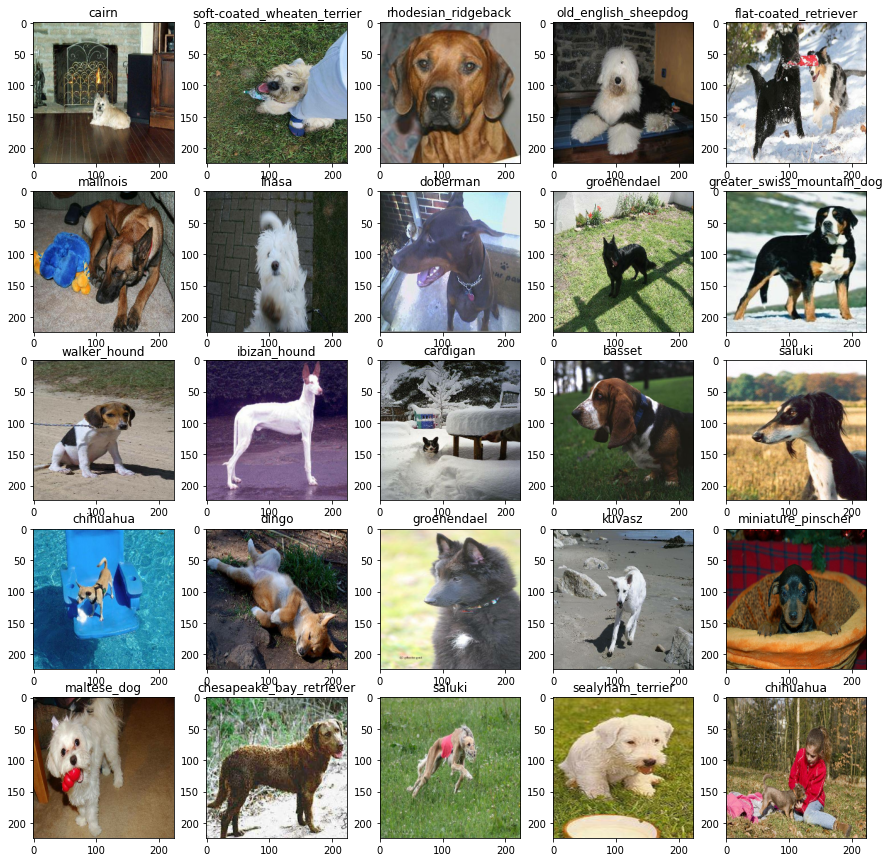

In [ ]:
# this will unbatch the train data and provide us with the numpy array to work
train_images, train_labels = next(train_data.as_numpy_iterator())

# vislauize the taining data
show_25_images(train_images, train_labels)

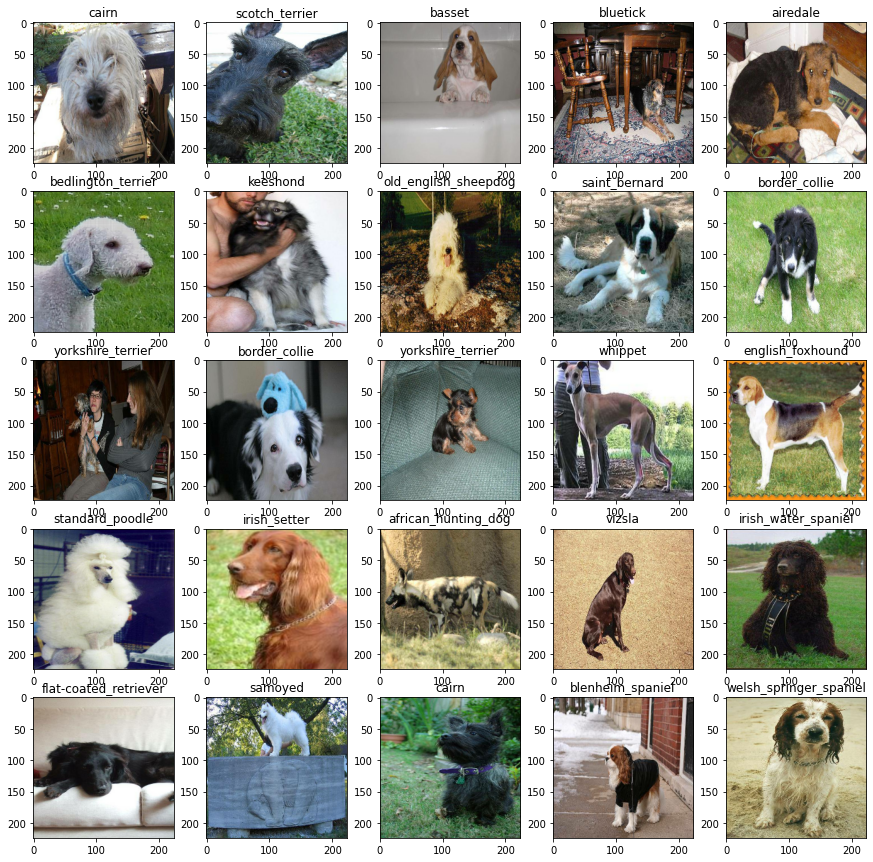

In [ ]:
# this will unbatch the train data and provide us with the numpy array to work
train_images, train_labels = next(val_data.as_numpy_iterator())

# vislauize the valid  data
show_25_images(train_images, train_labels)

## Building a Model

Before we Build a model , there are few things we need to define
* The input shape (our images shape, in the form of Tensors) to our model.
* The output shape(image labels, in the form of tensors) of our model
* The URL of the model we want to use


In [ ]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] #batch , height , width, colour channels

# Setup output shape
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from tensorFlow hub
MODEL_URL =  "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

Now we have got our inputs , outputs and model ready to go.
Lets put them togther into keras deep learning model

Knowing this. lets create a function which:
* Takes the input shape, output shape and the model we have choosen as parameters
* Defines the layers in a keras model in squential fashion 
* Compile the model ( evaluated and improved)
* Builds the model( tells the model the input shape it will be getting)
* Return the model

In [ ]:
# Create a fucion which build a keras model

def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Bulinding modle with  :", MODEL_URL)

  # setup the model layers
  # instanciate a model
  # It will run in an sequential fashion
  model = tf.keras.Sequential([
                               # layer 1 (inputlayer) 224 x 224 x 3
                               # tells tensorflow hub to create a keraslayer of MODEL_URL
                               hub.KerasLayer(MODEL_URL), 
                               
                               # layer 2 (output layer)
                               # Mobilenet v2 give output at size of 1280 array
                               # But  we want our output in the shape of 120 array
                               # becoz we have 120 labels , so we pass the output shape
                               # this job is being done by the model only 1 x 1x 120   
                               tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                                                     activation="softmax")
  ])


  # Diffrent problems have diffrent params
  # Binary classification      > Activation : Sigmoid, Loss : Binary Crossentropy
  # Multi class Classification > Activation : softmax, Loss : categorical Crossentropy

  # compile the model
  model.compile(
      # The goal of our model is to minimize the loss
      # getting it to zero
      # Loss is the measure of how well the model is guessing or learning patterns
      # The higher the loss the worse the prediction is
      loss=tf.keras.losses.CategoricalCrossentropy(),

      # here the adma() heple in optimizing the model
      # aka minimizing the loss
      optimizer=tf.keras.optimizers.Adam(),

      # Now this the judge which is telling how weel the model is learning
      # it gives the accuarcy score to judge the model
      # accuarcy is deafult of classification
      metrics=["accuracy"]
  )

  # build the model 
  model.build(INPUT_SHAPE)

  return model



   

In [ ]:
model = create_model()
model.summary()

Bulinding modle with  : https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  5432713   
_________________________________________________________________
dense (Dense)                multiple                  120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


# here  total params are 5552953 becoz mobilenet v2 
# use imagenet dataset images to train it
# we are just utlizing this to train our own params which are 120240

## Creating callbacks

Callbacks are helper function a model can use during training to do such things as save its progress, check its progress or stop training early if a model stops improving

We will create two callbacks, one for TensorBoard which hepls track our models progress and another for early stopping which prevents our model from training too long


## TensorBoard Callback

To setup a tenboard callback we need to do three things
1. Load the tensorboard notebook extension
2. create tensorboard callback which is able to save logs
3. Visualize our model training logs with `%tensorflow` magic function 

In [ ]:
# Load TensorBoard notebook extension
%load_ext tensorboard


import datetime

# create function to build a tensorBoard callback
def create_tensorboard_callback():
  # create a log directory for storing tensorboard logs
  logdir = os.path.join("drive/My Drive/Dog Vision/logs",
                        # Make it so the logs get tracked whenver we run an experiment
                        # we are appending the time with the logs
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S") 
                        )
  
  return tf.keras.callbacks.TensorBoard(logdir)

## Early Stopping callback

Early stopping helps stop our model from overfitting by stopping traing if a certian evalaution metric stops improving like accuracy

In [ ]:
# create early stopping callback

# here we monitor the accuracy
# and stop after 3 epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

# Traning A model ( on subset of 1000)

Our first model is only going to train on 1000 images , to make sure everything is working

In [ ]:
# epochs is number of times we give our model chance to train on the training set

NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

Lets create a function which train a model

* Create a model using create_model()
* setup a TesnorBoard callback using create_tensboard_callback()
* Call the fit() fubnction on our model passing it the training data , validation data, number of epochs to train for (NUM_EPOCHS) and the callbacks we like to use
* Return the model

In [ ]:
# Build a function to train and return a trained model

def train_model():
  """
  Trains a given model and return the trained version
  """

  # create a model
  model = create_model()

  # Create new tenserBoard session evertime we train a model
  tensorboard = create_tensorboard_callback()

  # fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  
  # return the fitted model
  return model

In [ ]:
# fit the model to the data
model = train_model()

Bulinding modle with  : https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 [==============================] - 381s 15s/step - loss: 4.5783 - accuracy: 0.0975 - val_loss: 3.5165 - val_accuracy: 0.2400
Epoch 2/100
25/25 [==============================] - 5s 200ms/step - loss: 1.6218 - accuracy: 0.6875 - val_loss: 2.2832 - val_accuracy: 0.4750
Epoch 3/100
25/25 [==============================] - 5s 200ms/step - loss: 0.5531 - accuracy: 0.9425 - val_loss: 1.7138 - val_accuracy: 0.5750
Epoch 4/100
25/25 [==============================] - 5s 202ms/step - loss: 0.2472 - accuracy: 0.9912 - val_loss: 1.5343 - val_accuracy: 0.5900
Epoch 5/100
25/25 [==============================] - 5s 203ms/step - loss: 0.1430 - accuracy: 0.9987 - val_loss: 1.4566 - val_accuracy: 0.6250
Epoch 6/100
25/25 [==============================] - 5s 202ms/step - loss: 0.0993 - accuracy: 1.0000 - val_loss: 1.3886 - val_accuracy: 0.6350
Epoch 7/100
25/25 [===========================

## HOw prevent model from overfitting in deep learning nueral networks

**Overfitting to begin with is a good thing! it means our model is learning

### Checking the tensorBoard logs

The TenserBoard magic function (%tensorboard) will access the logs directory we created earlier and visualize its contents

In [ ]:
%tensorboard --logdir drive/My\ Drive/Dog\ Vision/logs

<IPython.core.display.Javascript object>

## MAking and evaluating predictions using a trained model

In [ ]:
# Make predictions on the validation data (not used to train on )

predictions = model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 1s 125ms/step


array([[7.3577452e-04, 1.0691406e-04, 1.2828098e-03, ..., 8.8097215e-05,
        1.7730188e-05, 1.0933137e-03],
       [2.5140718e-03, 2.3225235e-04, 7.7767223e-03, ..., 2.6441639e-04,
        3.5027545e-03, 3.9309656e-04],
       [6.0713164e-06, 4.0796513e-06, 6.8783775e-06, ..., 1.8055800e-05,
        9.1152033e-06, 6.8958128e-05],
       ...,
       [7.6550286e-06, 7.5862241e-05, 7.1317787e-05, ..., 4.4837550e-05,
        3.0816105e-04, 3.5490706e-05],
       [4.1436590e-03, 4.4874815e-04, 9.9301818e-05, ..., 2.6667578e-05,
        2.3093837e-05, 8.8413358e-03],
       [5.8030046e-04, 2.3512068e-04, 1.5069947e-03, ..., 1.3347804e-02,
        1.6597095e-03, 9.4128132e-05]], dtype=float32)

In [ ]:
predictions.shape

(200, 120)

In [ ]:
len(y_val)

200

In [ ]:
len(unique_breeds)

120

In [ ]:
predictions[0]

array([7.35774520e-04, 1.06914064e-04, 1.28280977e-03, 1.23672828e-04,
       2.91325443e-04, 2.97830011e-05, 1.13200443e-02, 9.88317421e-04,
       2.78799620e-04, 3.32588010e-04, 2.69493408e-04, 1.23915449e-03,
       7.46126403e-04, 5.98619226e-05, 7.22579643e-05, 5.15319640e-04,
       5.59726905e-05, 2.88260728e-01, 4.36892988e-05, 7.59456379e-05,
       2.23675321e-04, 8.40678476e-05, 4.65153498e-05, 1.09810266e-03,
       2.27702640e-05, 1.31875655e-04, 4.66216095e-02, 2.62525919e-05,
       5.29853103e-04, 6.94615228e-05, 1.33722977e-04, 3.73941078e-03,
       9.91541383e-05, 9.57698649e-06, 6.79886318e-04, 1.02243207e-01,
       1.31049883e-05, 7.73238935e-05, 2.60600464e-05, 3.54841432e-05,
       1.05579430e-03, 1.22759775e-05, 1.52429275e-04, 6.71004527e-05,
       2.14692445e-05, 6.51181617e-05, 6.89886610e-06, 1.09465956e-03,
       2.21873401e-04, 7.99605856e-04, 8.39641580e-05, 5.10552672e-05,
       3.44468164e-04, 9.86878149e-05, 4.36830087e-05, 1.53694244e-04,
      

In [ ]:
# here there are 200 such arrays and in each there are 120 predictions
# in each predictions the value indicate the probability of the image with label
# higher the value means higher the prob that image is realted to that label

In [ ]:
np.sum(predictions[0])

1.0

In [ ]:
# so if we sum up all the prediction in a array for an image it will sum up to 1
# which is the rule of probability as we know
np.sum(predictions[1])

0.9999999

In [ ]:
# first predictions
index = 0
print(predictions[index])
print(f"Max value (probability of prediction : {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index : {np.argmax(predictions[index])}")
print(f"Precdicted label : {unique_breeds[np.argmax(predictions[index])]}")

[7.35774520e-04 1.06914064e-04 1.28280977e-03 1.23672828e-04
 2.91325443e-04 2.97830011e-05 1.13200443e-02 9.88317421e-04
 2.78799620e-04 3.32588010e-04 2.69493408e-04 1.23915449e-03
 7.46126403e-04 5.98619226e-05 7.22579643e-05 5.15319640e-04
 5.59726905e-05 2.88260728e-01 4.36892988e-05 7.59456379e-05
 2.23675321e-04 8.40678476e-05 4.65153498e-05 1.09810266e-03
 2.27702640e-05 1.31875655e-04 4.66216095e-02 2.62525919e-05
 5.29853103e-04 6.94615228e-05 1.33722977e-04 3.73941078e-03
 9.91541383e-05 9.57698649e-06 6.79886318e-04 1.02243207e-01
 1.31049883e-05 7.73238935e-05 2.60600464e-05 3.54841432e-05
 1.05579430e-03 1.22759775e-05 1.52429275e-04 6.71004527e-05
 2.14692445e-05 6.51181617e-05 6.89886610e-06 1.09465956e-03
 2.21873401e-04 7.99605856e-04 8.39641580e-05 5.10552672e-05
 3.44468164e-04 9.86878149e-05 4.36830087e-05 1.53694244e-04
 8.73506360e-05 2.75251060e-03 9.91599984e-04 1.38541684e-01
 3.06849135e-04 8.61014341e-05 6.52801944e-04 3.65140841e-05
 3.19347077e-04 3.481476

Having the aboove functionality is greater but we want to be able to do it at scale.

And it would be even better if we could see the image the predictions is being made on

**Note** Predcitions probablities are also known as confidence levels

In [ ]:
# Tuen probalities into their respective lables 

def get_pred_label(prediction_probabilities):
  """
  tuens an array of predictions probabliites into a label
  """

  return unique_breeds[np.argmax(prediction_probabilities)]


# get a predictited label based on an array of predcition prob
pred_label = get_pred_label(predictions[81])
pred_label

In [ ]:
val_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

Now since our validation data is still in a batch dataset ,
we will have to unbatch it to make precitions on the 
validation images and then compare those predictions to the validation labels(truth labels)

In [ ]:
# Create a function to unbatch a dataset of batch


def unbatch_dataset(batch_dataset):

  """
  Take a batch datat set and unbatch it
  """
  images = []
  labels = []


  # loop through the unbarched data
  for image , label in batch_dataset.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])

  return images,labels


val_images, val_labels = unbatch_dataset(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [ ]:
get_pred_label(val_labels[0])

'affenpinscher'

In [ ]:
get_pred_label(predictions[0])

'border_terrier'

 Now we have got way to get :
  * Prediction labels
  * Validation labels
  * Validation images

Lets make some functions to make these all abit more vuisual  

we will create a function which:
* Takes an array of precictions prob , an array of truth labels, and an arrya of images and integers
* Convert the predictions prob to a predicted label
* plot the predicted label, its precited prob, the truth label and the target image on a single plot

In [ ]:
# here we pass all the prediction probs
# val labels
# images
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the predicitons , gorund truth and image for sample n
  """

  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # get the pred label
  pred_label = get_pred_label(pred_prob)

  # plot image $ remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # change colour of pred label
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"  


  # cyhnage the plot title to be opredicted , prob of p[rediction and truth label
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
                                    color=color)
  
  


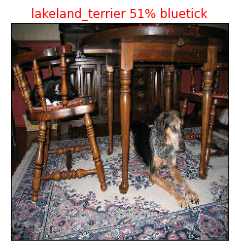

In [ ]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=3)

Now we have got one function to visualize our model top predictions, lets make another to view our model top 10 predictions.

this fucntion will:
 * Take an input of predictions prob array and a ground truth array and an integer
 * find the predictions using get_pred_label
 * find the top 10:
    * Predictions prob of indexes
    * precition prob values
    * Preciction prob labels

  * Plot the top 10 preciction prob values and labels . colouring the true label green  

In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n = 1):
  """
  """

  pred_prob , true_label = prediction_probabilities[n], labels[n]

  # get the predicted label
  pred_label = get_pred_label(pred_prob)

  # find the top 10 predciitons confidence indexes
  # here we first sort the the array
  # then slice the top 10 index 
  # then again sort them in desecding order
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]

  # find the top 10 predictions from the confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]

  # find the top 10 predcitions labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]


  # setup a plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey"
                     )
  
  plt.xticks(np.arange(len(top_10_pred_values)),
             labels=top_10_pred_labels,
             rotation="vertical")
  
  # change colour of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass



  



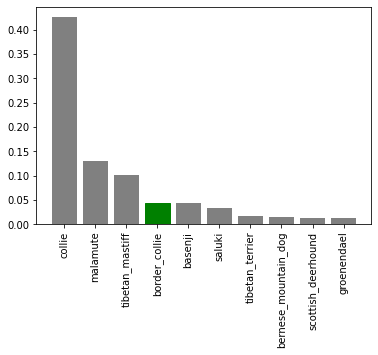

In [ ]:
plot_pred_conf(prediction_probabilities=predictions,
               labels = val_labels,
               n=9)

Now we have got some functions to help us visualize our predictons and evaluate our model, lets check out a few

In [ ]:
# lsts check out a few precitions and their diffrent values

# chnge this to see net ten 
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows * num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n=i+i_multiplier)
  

plt.tight_layout(h_pad=1.0)  
plt.show()

NameError: ignored

## Create a function to save a model

In [ ]:
# create a function for saving a trained model

def save_model(model, suffix=None):
  """
  Save a given model in a model directory and appends a suffix
  """

  # create a model directory pathname with current time
  modeldir = os.path.join("drive/My Drive/Dog Vision/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  
  model_path = modeldir + "_" + suffix + ".h5" # save format 
  model.save(model_path)
  return model_path

In [ ]:
# create a function to load a trained model

def load_model(model_path):
  """
  return a trained model from the model_path
  """

  print(f"Loading save model :" , {model_path})

  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  
  return model



In [ ]:
# Save model trained on 1000 images
save_trained_model = save_model(model, suffix="1000-images-mobilenetV2-Adam")

In [ ]:
# laod model
load_image_model = load_model(save_trained_model)

Loading save model : {'drive/My Drive/Dog Vision/models/20200404-03521585972350_1000-images-mobilenetV2-Adam.h5'}


In [ ]:
# evaluate the pre-saved model
model.evaluate(val_data)

7/7 [==============================] - 1s 115ms/step - loss: 1.2213 - accuracy: 0.6700


[1.2212952375411987, 0.6700000166893005]

In [ ]:
# evalutae saved model
load_image_model.evaluate(val_data)

7/7 [==============================] - 1s 117ms/step - loss: 1.2213 - accuracy: 0.6700


[1.2212952375411987, 0.6700000166893005]

## Train a big dog Model (on full dataset)

In [ ]:
# create a data batch with the full data set
full_data = create_data_batches(X, y)

Creating training data batches


In [ ]:
full_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [ ]:
full_model =  create_model()

Bulinding modle with  : https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [ ]:
# create full model callbacks
full_model_tensorBoard = create_tensorboard_callback()


#No validation set wehn training on all data 
full_model_early_stoping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                            patience=3)

ERROR! Session/line number was not unique in database. History logging moved to new session 59


** Now Running the cell below will take a little while ( 1 hr) beacuse the GPU we are using in the runtime has to loas all of the image into memory 

In [ ]:
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorBoard, full_model_early_stoping])

Epoch 1/100
320/320 [==============================] - 4501s 14s/step - loss: 1.3356 - accuracy: 0.6690
Epoch 2/100
320/320 [==============================] - 52s 163ms/step - loss: 0.4051 - accuracy: 0.8795
Epoch 3/100
320/320 [==============================] - 51s 159ms/step - loss: 0.2368 - accuracy: 0.9345
Epoch 4/100
320/320 [==============================] - 50s 157ms/step - loss: 0.1538 - accuracy: 0.9627
Epoch 5/100
320/320 [==============================] - 50s 158ms/step - loss: 0.1066 - accuracy: 0.9793
Epoch 6/100
320/320 [==============================] - 49s 154ms/step - loss: 0.0765 - accuracy: 0.9871
Epoch 7/100
320/320 [==============================] - 50s 155ms/step - loss: 0.0579 - accuracy: 0.9914
Epoch 8/100
320/320 [==============================] - 49s 153ms/step - loss: 0.0462 - accuracy: 0.9938
Epoch 9/100
320/320 [==============================] - 48s 150ms/step - loss: 0.0385 - accuracy: 0.9943
Epoch 10/100
320/320 [==============================] - 48s 150m

In [ ]:
full_save_model = save_model(full_model, suffix="full-images-set-mobilenetV2-Adam")

In [ ]:
# Now load the full model
loaded_full_model =  load_model("/content/drive/My Drive/Dog Vision/models/20200404-05291585978164_full-images-set-mobilenetV2-Adam.h5")

Loading save model : {'/content/drive/My Drive/Dog Vision/models/20200404-05291585978164_full-images-set-mobilenetV2-Adam.h5'}


## Making predictions on the test dataset

since our model has been trained on images in the form of Tensor batches , to make precitions on the test data, we will have to get it into the same format

Luckily we created create_data_batches() warlier which can take a list of filenames as input and convert them into Tensor batches.

To make predictions on the test data , will :
* Get the test image filenames
* convert the filenames into test data batches using create_data_batches() and setting the test_data parameter to True (since the test data doestnt have labels ).
* Make a preictions array by passing the test batches to the predict() method called on our model

In [ ]:
# Load test image filenames
import os 

test_path = "/content/drive/My Drive/Dog Vision/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['/content/drive/My Drive/Dog Vision/test/ef8f1d898040c1fe2972ebe945184056.jpg',
 '/content/drive/My Drive/Dog Vision/test/f4b31ede23331910d4f15664be4db5d3.jpg',
 '/content/drive/My Drive/Dog Vision/test/e904aa7e76ba608b3f658aa3817e12b9.jpg',
 '/content/drive/My Drive/Dog Vision/test/e86bb44f11c953a6d69c548e756f5a3b.jpg',
 '/content/drive/My Drive/Dog Vision/test/f1478f740513a7406d715c9d7ead6053.jpg',
 '/content/drive/My Drive/Dog Vision/test/f3e62da9f6f0aec7359dc70c139d7266.jpg',
 '/content/drive/My Drive/Dog Vision/test/f285b753c96949769c745ec0f90b2253.jpg',
 '/content/drive/My Drive/Dog Vision/test/f11d3e75389720c45f2c0001c131ba21.jpg',
 '/content/drive/My Drive/Dog Vision/test/eef2fd5db98424ae214e176a910e9e3b.jpg',
 '/content/drive/My Drive/Dog Vision/test/f050fe5feb0a81de5da10a5e806e739a.jpg']

In [ ]:
len(test_filenames)

10357

In [ ]:
# create batches for test data

test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches...


In [ ]:
test_data

<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [ ]:
# Make prediction on test data btch using loaded model

# test_predictions = loaded_full_model.predict(test_data, verbose=1)

In [ ]:
# save predictions ( NUmpy array) to csv file 

# np.savetxt("/content/drive/My Drive/Dog Vision/dog-vision-prediction-probabilites-array.csv", delimiter=",")

In [ ]:
# load predcitons from csv file
import numpy as np
test_predictions = np.loadtxt("/content/drive/My Drive/Dog Vision/dog-vision-prediction-probabilites-array.csv", delimiter=",")

In [ ]:
test_predictions[:10]

array([[1.61196489e-09, 3.44086413e-12, 2.32834394e-11, ...,
        1.06917716e-13, 1.58530451e-08, 1.52161670e-06],
       [3.17894322e-10, 3.20088262e-14, 1.85374840e-10, ...,
        7.00588814e-08, 1.88822238e-08, 2.56980937e-10],
       [4.27301083e-09, 1.84139528e-13, 1.11784948e-09, ...,
        2.71949238e-12, 2.23927123e-06, 7.41860809e-11],
       ...,
       [4.47232779e-10, 4.28004029e-07, 4.11986996e-08, ...,
        4.65437893e-07, 8.21722967e-10, 8.86002116e-09],
       [3.50528079e-11, 1.94377336e-03, 1.44941642e-10, ...,
        1.56135718e-06, 6.13228721e-08, 7.32120961e-12],
       [1.23221771e-08, 3.08354520e-09, 1.87174110e-10, ...,
        8.16165635e-10, 9.98905063e-01, 6.73740752e-09]])

In [ ]:
test_predictions.shape

(10357, 120)

## preparing the test dataset what kaggle need

To get the data in form kaggle need 
* Create a pandas Dataframe with an ID column as well as a column for each dog breed
* Add data to the ID column by extracting the test image ID from their filter
* Add data (the prediction probabilities ) to each of the dog  breed columns 
* Export the dataframes as a CSV to submit it to kaggle

In [ ]:
# create pandas dataframe

preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds)) 
preds_df

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [ ]:
# Appaend test images IDs to prediction DataFRame
test_ids = [os.path.splitext(path) for path in os.listdir(test_path)]

In [ ]:
test_ids[:10]

[('ef8f1d898040c1fe2972ebe945184056', '.jpg'),
 ('f4b31ede23331910d4f15664be4db5d3', '.jpg'),
 ('e904aa7e76ba608b3f658aa3817e12b9', '.jpg'),
 ('e86bb44f11c953a6d69c548e756f5a3b', '.jpg'),
 ('f1478f740513a7406d715c9d7ead6053', '.jpg'),
 ('f3e62da9f6f0aec7359dc70c139d7266', '.jpg'),
 ('f285b753c96949769c745ec0f90b2253', '.jpg'),
 ('f11d3e75389720c45f2c0001c131ba21', '.jpg'),
 ('eef2fd5db98424ae214e176a910e9e3b', '.jpg'),
 ('f050fe5feb0a81de5da10a5e806e739a', '.jpg')]

In [ ]:
preds_df['id'] = test_ids

ERROR! Session/line number was not unique in database. History logging moved to new session 59


In [ ]:
preds_df[:3]

id  ... yorkshire_terrier
0  (ef8f1d898040c1fe2972ebe945184056, .jpg)  ...               NaN
1  (f4b31ede23331910d4f15664be4db5d3, .jpg)  ...               NaN
2  (e904aa7e76ba608b3f658aa3817e12b9, .jpg)  ...               NaN

[3 rows x 121 columns]

In [ ]:
# Add the predcitions probalities to the dataframe

preds_df[list(unique_breeds)] = test_predictions
preds_df[:2]

id  ... yorkshire_terrier
0  (ef8f1d898040c1fe2972ebe945184056, .jpg)  ...       1.52162e-06
1  (f4b31ede23331910d4f15664be4db5d3, .jpg)  ...       2.56981e-10

[2 rows x 121 columns]

In [ ]:
# Save our predictions dataframe to csv file

preds_df.to_csv("/content/drive/My Drive/Dog Vision/full_model_prediction_submit.csv", index=False)

## MAking predictions on custom images

To make predictions of our images , we will:
* Get the filepaths of our images
* Turn the filepath into databatch using create_data_batches(). And since our custom images wont have labels, we set the test_data to true
* Pass the custom image data to our model predict() method
* convert the predcition output probablilities to predctions labels
* compare the predctions labels to sutom images

In [ ]:
# Get custom image filepaths

custom_path = "/content/drive/My Drive/Dog Vision/dogs/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [ ]:
custom_image_paths

['/content/drive/My Drive/Dog Vision/dogs/cute-puppy-body-image.jpg',
 '/content/drive/My Drive/Dog Vision/dogs/senior-golden-retriever-with-ball-picture-id488657289.jpg',
 '/content/drive/My Drive/Dog Vision/dogs/Acute-Dog-Diarrhea-47066074.jpg']

In [ ]:
# Tuen custom images into batch
custom_data = create_data_batches(custom_image_paths, test_data=True)
custom_data

Creating test data batches...


<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [ ]:
# make predcitons
custom_preds = loaded_full_model.predict(custom_data)

In [ ]:
# so we get 3 predcitions  
# with 120 predictions in each array
custom_preds.shape

(3, 120)

In [ ]:
# get custom image predctions labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['shih-tzu', 'golden_retriever', 'pug']

In [ ]:
# get custom images 
custom_image = []

# loop thorugh unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_image.append(image)

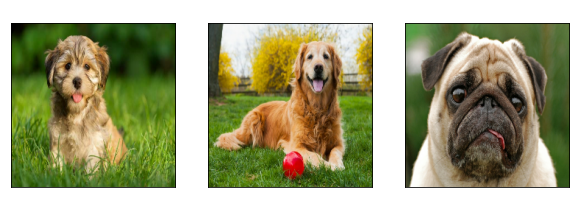

In [ ]:
# check custom image  predctions
plt.figure(figsize=(10, 10))

for i, image in enumerate(custom_image):
  plt.subplot(1, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i], color="white")
  plt.imshow(image)